<a href="https://colab.research.google.com/github/ajeuphoria/MSc-Dissertation-Project/blob/main/MSc_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/ajeuphoria/MSc-Dissertation-Project/main/raw-data-kaggle.csv'
df = pd.read_csv(url)

In [ ]:
#Reading the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  23732 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#Using Data Imputation and filling in HR data and grouping by runners

grouped_data = df.groupby("athlete")
imputed_data = grouped_data["average heart rate (bpm)"].transform("mean")
df["average heart rate (bpm)"] = df["average heart rate (bpm)"].fillna(imputed_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  40530 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# Identifying rows which are missing Heart rate

missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

        athlete gender         timestamp  distance (m)  elapsed time (s)  \
2413   20181492      F  05/01/2020 09:07       10008.0              3486   
2414   20181492      F  04/01/2020 08:07       15162.9              4761   
2415   20181492      F  02/01/2020 10:50       11583.4              3710   
2416   20181492      F  31/12/2019 10:52       12008.9              3790   
2417   20181492      F  30/12/2019 07:49        5397.8              1718   
...         ...    ...               ...           ...               ...   
40265  20181492      F  25/03/2017 16:30        4579.8              1949   
40266  20181492      F  21/03/2017 05:24        5305.4              1770   
40267  20181492      F  18/03/2017 12:30       15093.7              5888   
40268  20181492      F  17/03/2017 05:25        6981.5              2295   
40269  20181492      F  15/03/2017 04:58       10968.0              3548   

       elevation gain (m)  average heart rate (bpm)  
2413                 42.0        

In [ ]:
# Filling rows with missing heart rates by substituting with overall mean

overall_mean = df['average heart rate (bpm)'].mean()

# Identify runners without heart rate data

df['average heart rate (bpm)'].fillna(overall_mean, inplace=True)

print(overall_mean)

147.61074077807584


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  42116 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


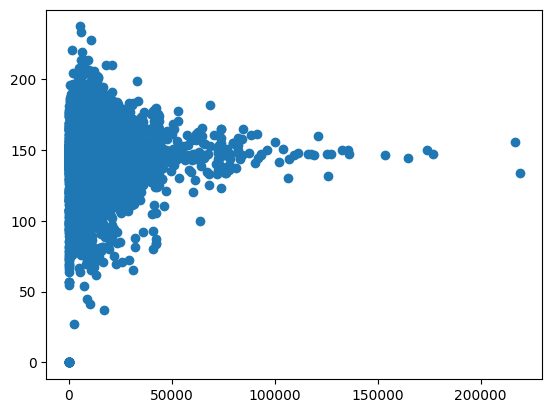

In [ ]:
# Visuals

# Creating a scatter plot

plt.scatter(df['distance (m)'], df['average heart rate (bpm)'])

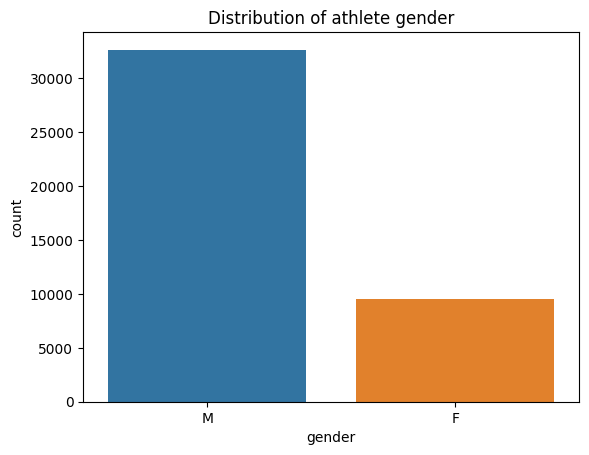

In [ ]:
# Distribution of athlete gender

sns.countplot(data = df, x = 'gender')
plt.title('Distribution of athlete gender')
plt.show()

<Axes: >

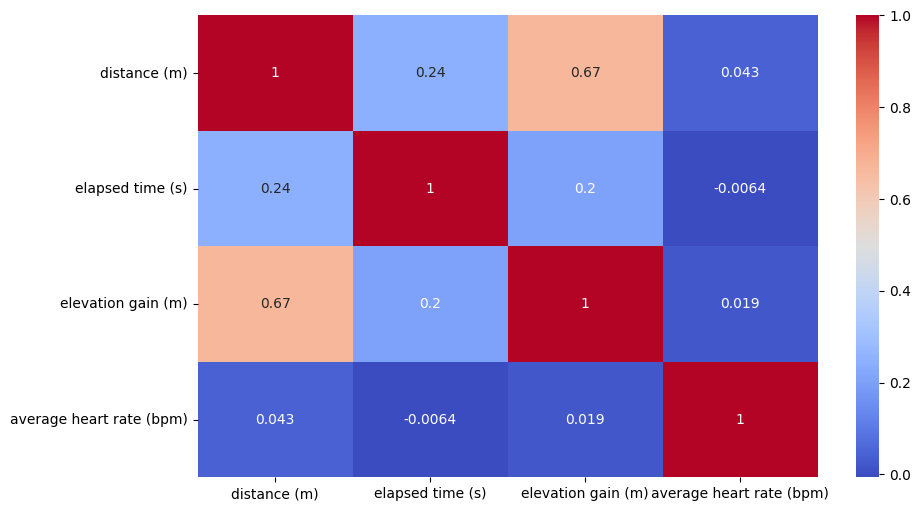

In [ ]:
# Corelation Heatmap

for_corr= df.drop(columns = 'athlete')
plt.figure(figsize=(10,6))
corr_matrix = for_corr.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

In [ ]:
corr_matrix["elapsed time (s)"].sort_values(ascending = False)

elapsed time (s)            1.000000
distance (m)                0.244388
elevation gain (m)          0.203775
average heart rate (bpm)   -0.006424
Name: elapsed time (s), dtype: float64

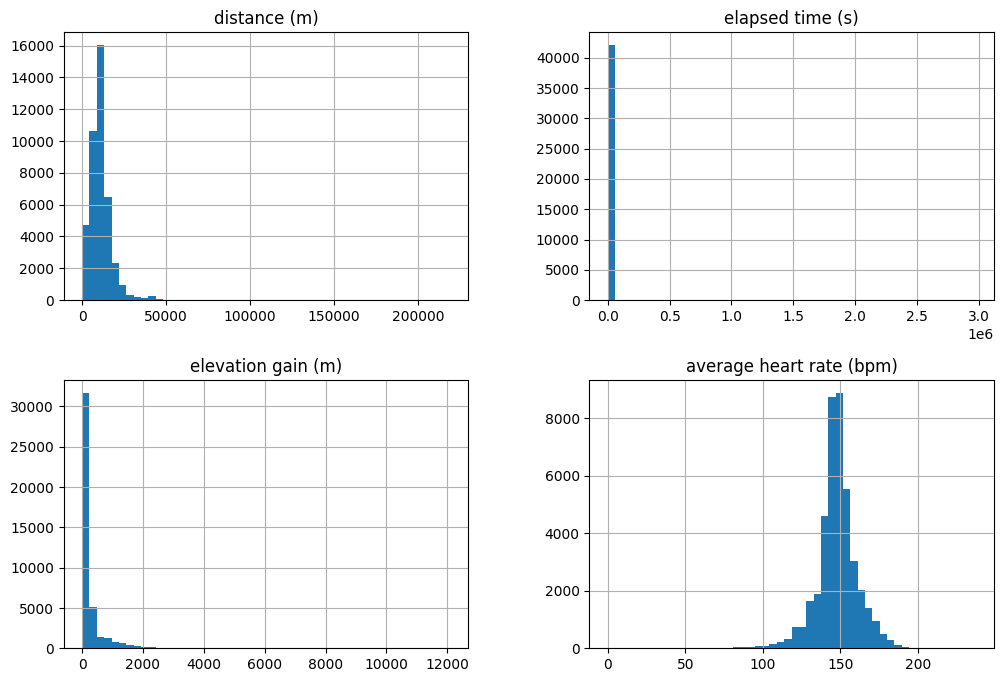

In [ ]:
for_hist = df.drop(columns = 'athlete')
for_hist.hist(bins = 50, figsize = (12,8))  # bins = 50 is grouping the total dataset into 50 groups)
plt.show()

In [ ]:
# Drop duplicates based on 'runner_id' and 'timestamp' columns

df = df.drop_duplicates(subset=['athlete', 'timestamp'])

# The resulting DataFrame (df) will have duplicates removed based on both columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41644 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   41644 non-null  int64  
 1   gender                    41644 non-null  object 
 2   timestamp                 41644 non-null  object 
 3   distance (m)              41644 non-null  float64
 4   elapsed time (s)          41644 non-null  int64  
 5   elevation gain (m)        41644 non-null  float64
 6   average heart rate (bpm)  41644 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.5+ MB


## Grouping Athletes to understand their frequency of runs in a week and categorising them as High, Low and Medium

In [ ]:
cleaned_data = pd.DataFrame(df)
cleaned_data.to_csv('cleaned_data.csv', index = 'False')

In [ ]:
import shutil

# Source file (the exported data file)
source_file = 'cleaned_data.csv'  # Change this to your exported file

# Destination directory where you want to download the file
destination_directory = 'M.Sc Dissertation Project'  # Change this to your preferred directory

# Copy the file to the destination directory
shutil.copy(source_file, destination_directory)


'M.Sc Dissertation Project'

In [ ]:

# Convert the 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the week number from the 'timestamp' column
df['week_number'] = df['timestamp'].dt.week

# Categorize runners into 'High', 'Medium', and 'Low' based on their weekly runs
def categorize_runs(runs_per_week):
    if runs_per_week >= 5:
        return "High"
    elif 3 <= runs_per_week <= 4:
        return "Medium"
    else:
        return "Low"

runner_weekly_counts = df.groupby(['athlete', 'week_number']).size().reset_index(name='runs_per_week')  #Group by Athlete and Week number


runner_weekly_counts['run_category'] = runner_weekly_counts['runs_per_week'].apply(categorize_runs) # Creating new column run category and applying the categorize_runs functions for each row.

# Count the number of runners in each category
runner_category_counts = runner_weekly_counts.groupby('run_category')['athlete'].nunique().reset_index()  # Grouping by category and taking unique athlete id.

# Display the results
print(runner_category_counts)


  run_category  athlete
0         High      107
1          Low       89
2       Medium       99


In [ ]:
count_athletes = df['athlete'].nunique()
print(count_athletes)

116


In [ ]:
runner_weekly_counts.info()
runner_weekly_counts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   athlete        5565 non-null   int64 
 1   week_number    5565 non-null   int64 
 2   runs_per_week  5565 non-null   int64 
 3   run_category   5565 non-null   object
dtypes: int64(3), object(1)
memory usage: 174.0+ KB


,athlete,week_number,runs_per_week,run_category
0,771514,1,1,Low
1,771514,2,1,Low
2,771514,4,1,Low
3,771514,6,1,Low
4,771514,7,2,Low


In [ ]:
df.head()

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number
0,18042525,M,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50
1,18042525,M,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41
2,18042525,M,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11
3,18042525,M,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48
4,18042525,M,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47


Applying One-Hot Encoding Technique for the Gender Column

In [ ]:
df_encoded = pd.get_dummies(df, columns = ['gender'])
print (df_encoded)

        athlete           timestamp  distance (m)  elapsed time (s)  \
0      18042525 2019-12-15 09:08:00        2965.8               812   
1      18042525 2019-10-12 19:27:00       10020.8              3290   
2      18042525 2019-03-12 19:46:00       12132.2              4027   
3      18042525 2019-11-26 19:46:00       11631.5              4442   
4      18042525 2019-11-19 19:45:00       11708.1              4022   
...         ...                 ...           ...               ...   
42111  27950722 2017-11-17 17:48:00        5790.2              2242   
42112  27950722 2017-11-14 18:02:00        6452.9              2398   
42113  27950722 2017-12-11 09:48:00       12271.2              5334   
42114  27950722 2017-10-11 18:06:00        7057.4              2592   
42115  27950722 2017-08-11 17:39:00        6081.4              2319   

       elevation gain (m)  average heart rate (bpm)  week_number  gender_F  \
0                    17.4                     150.3           50     

In [ ]:
df_encoded.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1


In [ ]:
df_encoded = df_encoded.drop(columns = ['timestamp','athlete'])
df_encoded.head()

,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,2965.8,812,17.4,150.3,50,0,1
1,10020.8,3290,52.2,160.8,41,0,1
2,12132.2,4027,249.0,148.9,11,0,1
3,11631.5,4442,194.0,136.2,48,0,1
4,11708.1,4022,250.7,146.0,47,0,1


In [ ]:
df_encoded.head()

,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,2965.8,812,17.4,150.3,50,0,1
1,10020.8,3290,52.2,160.8,41,0,1
2,12132.2,4027,249.0,148.9,11,0,1
3,11631.5,4442,194.0,136.2,48,0,1
4,11708.1,4022,250.7,146.0,47,0,1


In [ ]:
encoded_data = df_encoded.copy()   #Keeping a copy of the label encoded data

Standardising the dataset for Regression Algorithms

In [ ]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoded_data = pd.DataFrame(scaler.fit_transform(encoded_data), columns=encoded_data.columns)
encoded_data.head()

,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,-1.076918,-0.215775,-0.498105,0.192574,1.539752,-0.52961,0.52961
1,-0.134666,-0.060167,-0.421243,0.951266,0.942148,-0.52961,0.52961
2,0.147328,-0.013887,0.013423,0.091416,-1.049865,-0.52961,0.52961
3,0.080456,0.012173,-0.108054,-0.826240,1.406952,-0.52961,0.52961
4,0.090686,-0.014201,0.017178,-0.118128,1.340551,-0.52961,0.52961


Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from math import sqrt

# Define your featues and target variable

X = encoded_data.drop(columns = ['elapsed time (s)'] )
y = encoded_data['elapsed time (s)']

# Split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
print('X_train shape is: ', X_train.shape)
print('y_train shape is: ', y_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (33315, 6)
y_train shape is:  (33315,)
X_test shape is:  (8329, 6)
y_test shape is:  (8329,)


Applying Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_samples=0.8)
RF.fit(X_train,y_train)

RandomForestRegressor(max_samples=0.8)

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
RF_train = RF.score(X_train, y_train)
print(RF_train)

0.770540657476751


In [ ]:
RF_test = RF.score(X_test, y_test)
print(RF_test)

0.6858450626329639


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RF_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(RF_MAE, 2)))

RF_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(RF_MSE, 2)))

RF_RMSE = sqrt(RF_MSE)
print('Root Mean Square Error  : %f' % RF_RMSE)

RF_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination)  : %f' % RF_R2_SCORE)


Mean Absolute Error : 0.04
Mean Squared Error : 0.02
Root Mean Square Error  : 0.137392
R2_SCORE (Coefficient Of Determination)  : 0.685845


Apply Cross validation on Random forest algorithm

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define your features and target variable
X = encoded_data.drop(columns=['elapsed time (s)'])
y = encoded_data['elapsed time (s)']

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Choose the number of folds (e.g., k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get the mean squared error (you can choose other regression metrics)
cv_results = cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive
cv_results = -cv_results

# Print the mean squared error for each fold
for i, mse_score in enumerate(cv_results, 1):
    print(f"Fold {i}: Mean Squared Error = {mse_score:.4f}")

# Print the average mean squared error
print("\nAverage Mean Squared Error: {:.4f}".format(np.mean(cv_results)))


Fold 1: Mean Squared Error = 0.0482
Fold 2: Mean Squared Error = 0.5249
Fold 3: Mean Squared Error = 4.2186
Fold 4: Mean Squared Error = 0.0303
Fold 5: Mean Squared Error = 1.8362

Average Mean Squared Error: 1.3316


Applying Decision Tree Regression Algorithm



In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
DT_train = dt.score(X_train, y_train)
print(DT_train)

0.9985054828689054


In [ ]:
DT_test = dt.score(X_test, y_test)
print(DT_test)

0.8041326556313825


In [ ]:
DT_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(DT_MAE, 2)))
DT_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(DT_MSE, 2)))
DT_RMSE = sqrt(DT_MSE)
print('Root Mean Square Error : %f' % DT_RMSE)
DT_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination) : %f' % DT_R2_SCORE)

Mean Absolute Error : 0.04
Mean Squared Error : 0.01
Root Mean Square Error : 0.108485
R2_SCORE (Coefficient Of Determination) : 0.804133


Applying Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
LR_train = LR.score(X_train, y_train)
print(LR_train)



0.053255305483280946


In [ ]:
LR_test = LR.score(X_test,y_test)
print(LR_test)

0.841870504841324


In [ ]:
LR_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(LR_MAE, 2)))

LR_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(LR_MSE, 2)))

LR_RMSE = sqrt(LR_MSE)
print('Root Mean Square Error  : %f' % LR_RMSE)

LR_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination)  : %f' % LR_R2_SCORE)

Mean Absolute Error : 0.06
Mean Squared Error : 0.01
Root Mean Square Error  : 0.097475
R2_SCORE (Coefficient Of Determination)  : 0.841871


In [ ]:
# Count the number of entries for each runner
runner_row_counts = df.groupby('athlete').size() # Grouping by taking unique athlete id.

# Display the results
print(runner_row_counts)

athlete
771514       76
1776170     654
2013538     155
2081128     752
2138770     558
           ... 
38870390      8
39076296     86
39963418     53
45799771     73
46817575     11
Length: 116, dtype: int64


In [ ]:
runner_row_counts.describe()

count     116.000000
mean      359.000000
std       259.524783
min         6.000000
25%       168.250000
50%       268.500000
75%       494.750000
max      1215.000000
dtype: float64

Apply XGBoost Regressor

In [48]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train, y_train)



XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [49]:
y_pred = xg_reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.17878209916857515


Plot a graph for the RMSE scores for the different models


In [ ]:
model_scores = [0.137, 1.3316, ]